# Classification

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0. <br>
Advanced* and optional - means it is optional and will not affect the grade.

In [1]:
import common as cm
import numpy as np
import matplotlib.pyplot as plt
import copy

## Copy object in python:

### Shallow copy:

In [2]:
X = [1,2]
Y = X.copy()
Y[0]=0
print('X: ',X,' Y: ',Y,' X==Y: ',X==Y)

X:  [1, 2]  Y:  [0, 2]  X==Y:  False


In [3]:
X = [[1,2]]
Y = X.copy()
Y[0][0]=0
print('X: ',X,' Y: ',Y,' X==Y: ',X==Y)

X:  [[0, 2]]  Y:  [[0, 2]]  X==Y:  True


### Deep copy

In [4]:
X = [1,2]
Y = copy.deepcopy(X)
Y[0]=0
print('X: ',X,' Y: ',Y,' X==Y: ',X==Y)

X:  [1, 2]  Y:  [0, 2]  X==Y:  False


In [5]:
X = [[1,2]]
Y = copy.deepcopy(X)
Y[0][0]=0
print('X: ',X,' Y: ',Y,' X==Y: ',X==Y)

X:  [[1, 2]]  Y:  [[0, 2]]  X==Y:  False


# Part 1: Naive Bayes for binary data

1.1 ) Given are the following objects (data) characterized with 4 binary attributes:

In [6]:
data = [
[1, 0, 1, 1],
[0, 1, 0, 0],
[0, 1, 1, 1],
[1, 0, 1, 0],
[1, 0, 0, 1],
[0, 0, 1, 1],
[1, 1, 1, 1],
[1, 0, 0, 1],
[0, 1, 0, 1],
[0, 0, 0, 1],
]

1.2) Each object is assigned to a class "0" or "1". The assignements are as follows (cl):

In [7]:
cl = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]

**1.3) When do you think an object is assigned to class "1"?**

In [8]:
# Most often when it has 1 at last two indices

1.4) Build a naive Bayes classifier. For this reason, complete the following function. This function should return a vector [p0, p1], where p0 and p1 are propabilities that an input object (obj) belongs to, respectively, class "0" and "1". In case when $P(x = 0\text{ or }1|CL = 0\text{ or }1) = 0$, replace it with $0.01$. Do not forget to normalize the ''probabilities'' (divide by sum). <br>
(Advanced*) Add support for non-binary attribute values.

In [9]:
def getNaiveBayesProbabilities(obj, data, cl):
    p = [0.0, 0.0]
    probabilitesTable = [[0]*len(obj), [0]*len(obj)]
    zeroQuantity = len(cl)-sum(cl)
    oneQuantity = sum(cl)
    for t in range(len(obj)):
        zeroSum = 0
        oneSum = 0
        for dataRowI in range(len(data)):
            if cl[dataRowI] == 1:
                if data[dataRowI][t] == 1:
                    oneSum+=1
            else:
                if data[dataRowI][t] == 1:
                    zeroSum+=1
        probabilitesTable[0][t] = zeroSum/zeroQuantity
        probabilitesTable[1][t] = oneSum/oneQuantity
    p[0] = zeroQuantity/len(cl)
    p[1] = oneQuantity/len(cl)
    for t in range(len(obj)):
        if obj[t]==0:
            p[0] *= 1-probabilitesTable[0][t]
            p[1] *= 1-probabilitesTable[1][t]
        else :
            p[0] *= probabilitesTable[0][t]
            p[1] *= probabilitesTable[1][t]
            
    if p[0] == 0: p[0]=0.01
    if p[1] == 0: p[1]=0.01
    return p
print(getNaiveBayesProbabilities([0,0,0,0], data, cl))
print(getNaiveBayesProbabilities([0,1,0,1], data, cl))

[0.051200000000000016, 0.01]
[0.019200000000000005, 0.03599999999999999]


1.6) Find objects which give a maximum probability for class "0" and "1".

In [10]:
allPossibleObjects =[]
max0Prob = 0
max0Obj = []
max1Prob = 0
max1Obj = []
for i in range(16):
    allPossibleObjects.append([int(x) for x in list(f"{i:04b}")])
    
    probablilites = getNaiveBayesProbabilities(allPossibleObjects[i], data, cl)
    if probablilites[0]>max0Prob:
        max0Prob = probablilites[0]
        max0Obj = allPossibleObjects[i]
    if probablilites[1]>max1Prob:
        max1Prob = probablilites[1]
        max1Obj = allPossibleObjects[i]
print('Max for 1:', max1Prob, max1Obj)
print('Max for 0:', max0Prob, max0Obj)

Max for 1: 0.144 [0, 1, 1, 1]
Max for 0: 0.1152 [1, 0, 0, 1]


## Part 2: k-NN algorithm

2.1) In common.py, there is defined a Euclidean distance function (cm.getEuclideanDistance(A, B)):

In [11]:
#TEST
print(cm.getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(cm.getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

1.0
1.4142135623730951


2.2) Get test data set & display:<br>
- DATA: data = matrix n x m, n = the number of objects, m = the number of attributes<br>
- CLASSIFIED : classified objects, [[list of objects (indices) being assigned to the fist class],[... to the second class],...,[... to the last class]]; note that the classes do not impose any preference order
- NOT_CLASSIFIED: list of objects (indices) being not classified

IMPORTANT: plot $\rightarrow$ black squares represent objects that are to be classified.

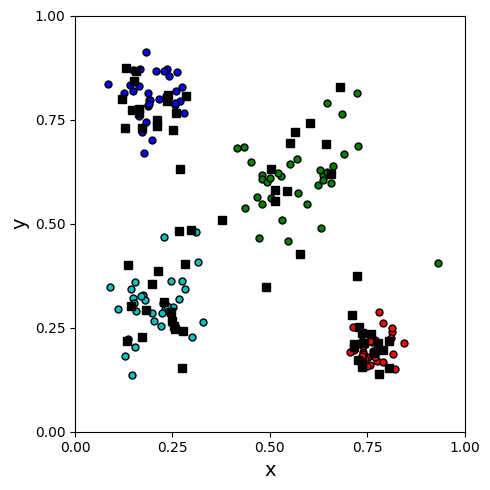

In [12]:
DATA = cm.getTestDataSet()
CLASSIFIED = cm.getTestClassified()
NOT_CLASSIFIED = cm.getTestNotClassified()
cm.displayDataSet(plt, DATA, CLASSIFIED, NOT_CLASSIFIED) #plt = plot package; see the imports above

### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED
### CLASS 4 = CYAN

2.3) k-NN implementation: Complete the below function. Use the "non-weighted" variant of k-NN.  <br>
(Advanced*) Add support to "weighted" variant of k-NN

[[0.9768663061556037, 0], [0.9755736381319507, 0]]
[[0.9659951853802279, 0], [0.9584373942014233, 0]]
[[0.9374518557877789, 0], [0.9280419834453679, 0]]
[[0.9804748490467377, 0], [0.9721387875098324, 0]]
[[0.9803881122348919, 0], [0.9732730590325777, 0]]
[[0.9914935494808301, 0], [0.9688453808752817, 0]]
[[0.9938453608285556, 0], [0.9924199297037093, 0]]
[[0.9851412632791088, 0], [0.984846184292369, 0]]
[[0.9776563981785942, 0], [0.9732790726762224, 0]]
[[0.9512664951663781, 0], [0.9488394414653971, 0]]
[[0.9835846818814018, 0], [0.9626303479056476, 0]]
[[0.991543952719916, 0], [0.9863763201715917, 0]]
[[0.9872005927931304, 0], [0.980316215190648, 0]]
[[0.9656416662057737, 0], [0.9501482195227652, 0]]
[[0.9984817957794188, 0], [0.9911323564678963, 0]]
[[0.9741898289092676, 0], [0.9547832893323259, 0]]
[[0.8153649035089263, 1], [0.8076816247090202, 1]]
[[0.8699167968662026, 2], [0.8448655849149809, 2]]
[[0.9322052512162313, 1], [0.8745234950422272, 1]]
[[0.9287586754306462, 1], [0.92573

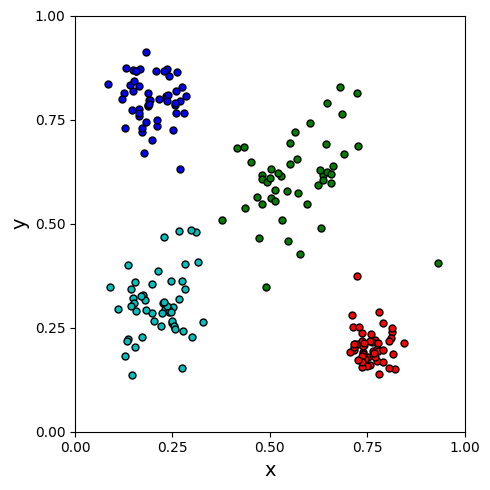

In [ ]:
from collections import defaultdict
def doKNN(K, DATA, CLASSIFIED, NOT_CLASSIFIED, weighted = False):
    ### COPY INPUT CLASSIFIED OBJECTS
    ### WHEN CLASSIFYING "NOT_CLASSIFIED" OBJECTS, UPDATE THE CL, i.e., ADD RESPECTIVE INDICES
    CL = copy.deepcopy(CLASSIFIED)
    ### For each index in NOT_CLASSIFIED, store here its corresponding (computed) class (in this exercise = 0, 1, or 2)
    UPDATE = []
    for IDX in NOT_CLASSIFIED:
        distances = []
        for groupInx in range(len(CLASSIFIED)):
            for classifiedPointInx in CLASSIFIED[groupInx]:
                distances.append([cm.getEuclideanDistance(DATA[IDX], DATA[classifiedPointInx]), groupInx])
        # sorting        
        distances = sorted(distances, key=lambda x: x[0])
        maxDist = distances[-1][0]
        minDist = distances[0][0]
        # similarity normalization
        distances = distances[:K]
        groupSimilarity = defaultdict(int)
        if weighted:
            for i in range(len(distances)):
                distances[i][0] = 1- (distances[i][0]/maxDist)
            # best K
            for distance in distances:
                groupSimilarity[distance[1]] += distance[0]
        else:
            for distance in distances:
                groupSimilarity[distance[1]] += 1
        CL[max(groupSimilarity, key=groupSimilarity.get)].append(IDX)
        UPDATE.append(max(groupSimilarity, key=groupSimilarity.get))

    ################
    return CL
#DISPLAY CLASSIFIED DATA
NEW_CLASSIFIED = doKNN(2, DATA, CLASSIFIED, NOT_CLASSIFIED)
cm.displayDataSet(plt, DATA, NEW_CLASSIFIED)

# Part 3 - performance evaluation

3.1) You are asked to evaluate the performance of k-NN (weighted variant) for different K. Firstly, run the below piece of code and analyze the data. **Which class do you think is the most difficult/easiest to describe/characterize?**

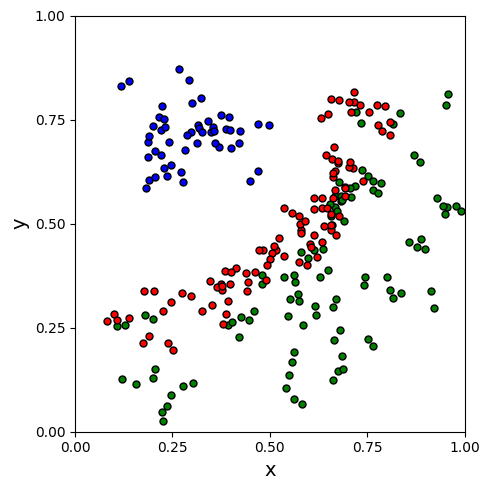

In [14]:
DATA_2 = cm.getTest2DataSet()
CLASSIFIED_2 = cm.getTest2Classified()
cm.displayDataSet(plt, DATA_2, CLASSIFIED_2)

### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED

# most difficult is class 2, becouse it if wide and diverse. It also mixes with class 3.



3.2) To evaluate the performance of k-NN, you can check how well it predicts classes for new (not known previously) objects. For this reason, assume that you "do not know" the true class assignments for some random subset of objects from the data set. Firstly, you can generate some permutation of indices from 0 to 249 (one per object):

In [15]:
idxs = [i for i in range(250)]
np.random.shuffle(idxs)

Then, the below piece of code constructs temporary variables CLASSIFIED_TRAIN and NOT_CLASSIFIED_TEST. CLASSIFIED_TRAIN contains information on assignements for the first 75% random objects determined by "idxs", while NOT_CLASSIFIED_TEST contains the remianing "not classified" object indices. Run the code below and observe that 25% of some uniformly distributed data points are not classified.

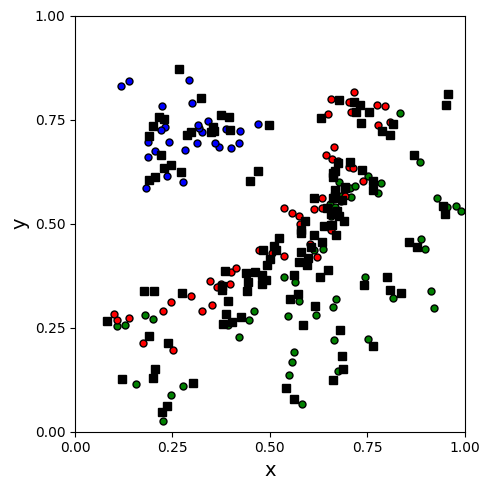

In [16]:
CLASSIFIED_TRAIN = [[], [], []]
NOT_CLASSIFIED_TEST = []
LIM = int(len(DATA_2) * 0.5)
for t in range(LIM):
    if idxs[t] < 50: CLASSIFIED_TRAIN[0].append(idxs[t])
    elif idxs[t] < 150: CLASSIFIED_TRAIN[1].append(idxs[t])
    else: CLASSIFIED_TRAIN[2].append(idxs[t])
for t in range(LIM, 250):
    NOT_CLASSIFIED_TEST.append(idxs[t])
cm.displayDataSet(plt, DATA_2, CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST)

3.3) Evaluate the performance of the weighted variant of k-NN for K = 1,3,5,7 and CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST data sets. For each K:<br>
- for each class, compute how many times an object has been correctly/incorrectly classified. E.g., if 10 objects are associated with the first class "BLUE" but k-NN classified correctly only 4 of them, the result is 4 (or 6 in case of incorrect assignments stat);<br>
- for each class, compute recall (number of correct assignments / total number of expected assignments, e.g., if 10 objects are associated with the first class "BLUE"  but k-NN classified correctly only 4 of them, recall for the first class is 40%);<br>  

**Which class got the best/the worst recall. Why?**<br>
**What is the best K. Are there any significant differences?**<br>
You can use cm.displayCompareDataSet(plt, DATA_2, CLASSIFIED_2, CL) to check (display) which solutions were classified incorrectly. These are marked with squares. The background of these squares is appropriately selected according to the true (expected) assignment.

1
[23, 39, 41]
[0, 13, 9]
[1.0, 0.75, 0.82]


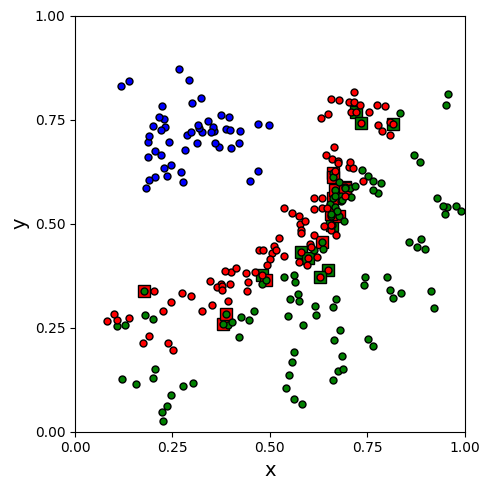

3
[23, 39, 40]
[0, 14, 9]
[1.0, 0.7358490566037735, 0.8163265306122449]


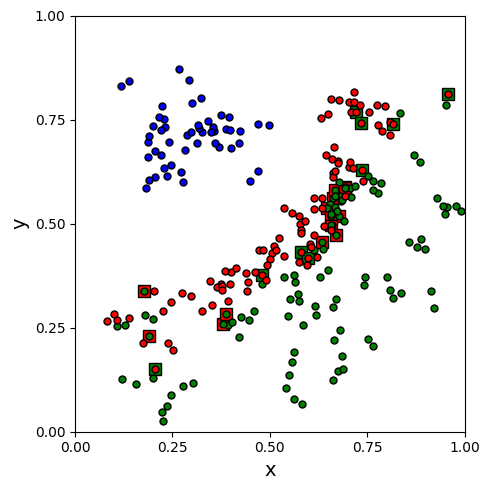

5
[23, 38, 41]
[0, 13, 10]
[1.0, 0.7450980392156863, 0.803921568627451]


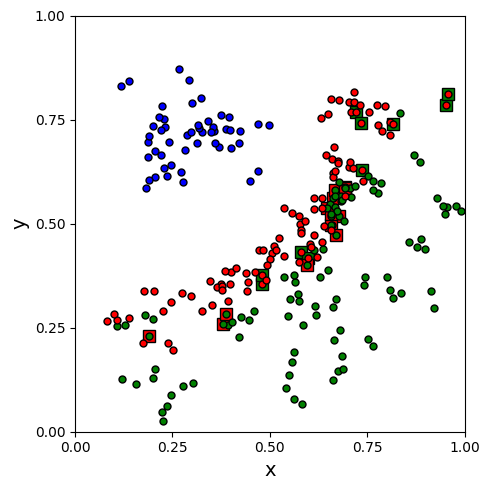

7
[23, 40, 40]
[0, 14, 8]
[1.0, 0.7407407407407407, 0.8333333333333334]


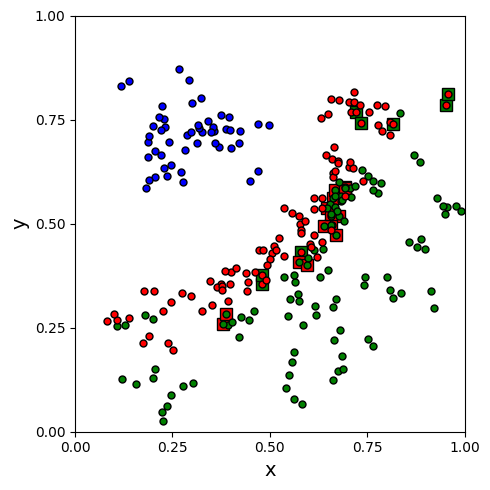

In [ ]:
### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED
CORRECT_ASSIGMENT = cm.getTest2Classified()
for K in [1,3,5,7]:
    CL = doKNN(K, DATA_2, CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST, True)
    print(K)
    CORRECTLY = [0,0,0]
    INCORRECTLY = [0,0,0]
    RECALL = [0,0,0]
    for pointInx in NOT_CLASSIFIED_TEST:
        for groupInx in range(len(CL)):
            if pointInx in CL[groupInx]:
                if pointInx in CORRECT_ASSIGMENT[groupInx]:
                    CORRECTLY[groupInx]+=1
                else:
                    INCORRECTLY[groupInx]+=1

    for i in range(len(CL)):
        RECALL[i] = CORRECTLY[i] / (CORRECTLY[i] + INCORRECTLY[i])

    ### PRINT STATS
    print(CORRECTLY)
    print(INCORRECTLY)
    print(RECALL)
    ### DISPLAY
    cm.displayCompareDataSet(plt, DATA_2, CLASSIFIED_2, CL)

# Class 1 (blue) has best recall, because all nearest elements belong to this group. It is separeted from others
# Class 3 (blue) has worst recall, because a lot of its elements mix with group 2 (theirs neightbours are red)

# Best K is 1, there is no significant difference